In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

sns.set_style("darkgrid")

Using TensorFlow backend.
C:\ProgramData\Anaconda3\Lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\Lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\Lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\Lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
df = pd.read_csv("Foreign_Exchange_Rates.csv")
df = df.drop(columns=["Unnamed: 0"])
df.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,03-01-2000,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,04-01-2000,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,05-01-2000,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,06-01-2000,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,07-01-2000,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [3]:
newColumnsNames = list(map(lambda c: c.split(" - ")[0] if "-" in c else "DATE", df.columns))
newColumnsNames
df.columns = newColumnsNames
df.head()

,DATE,AUSTRALIA,EURO AREA,NEW ZEALAND,UNITED KINGDOM,BRAZIL,CANADA,CHINA,HONG KONG,INDIA,...,SINGAPORE,DENMARK,JAPAN,MALAYSIA,NORWAY,SWEDEN,SRI LANKA,SWITZERLAND,TAIWAN,THAILAND
0,03-01-2000,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,04-01-2000,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,05-01-2000,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,06-01-2000,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,07-01-2000,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [4]:
# Fill ND values with previous and next values
df = df.replace("ND", np.nan)
df = df.bfill().ffill() 
df.tail(15)

,DATE,AUSTRALIA,EURO AREA,NEW ZEALAND,UNITED KINGDOM,BRAZIL,CANADA,CHINA,HONG KONG,INDIA,...,SINGAPORE,DENMARK,JAPAN,MALAYSIA,NORWAY,SWEDEN,SRI LANKA,SWITZERLAND,TAIWAN,THAILAND
5518,28-10-2020,1.4225,0.8907,1.4826,0.7536,4.019,1.2962,6.9618,7.7894,74.0206,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75
5519,29-10-2020,1.4225,0.8907,1.4826,0.7536,4.019,1.2962,6.9618,7.7894,74.4075,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75
5520,30-10-2020,1.4225,0.8907,1.4826,0.7536,4.019,1.2962,6.9618,7.7894,74.467,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75
5521,31-10-2020,1.4225,0.8907,1.4826,0.7536,4.019,1.2962,6.9618,7.7894,74.467,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75
5522,01-11-2020,1.4225,0.8907,1.4826,0.7536,4.019,1.2962,6.9618,7.7894,74.467,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75
5523,02-11-2020,1.4225,0.8907,1.4826,0.7536,4.019,1.2962,6.9618,7.7894,74.4555,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75
5524,03-11-2020,1.4225,0.8907,1.4826,0.7536,4.019,1.2962,6.9618,7.7894,74.4057,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75
5525,04-11-2020,1.4225,0.8907,1.4826,0.7536,4.019,1.2962,6.9618,7.7894,74.3925,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75
5526,05-11-2020,1.4225,0.8907,1.4826,0.7536,4.019,1.2962,6.9618,7.7894,74.0114,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75
5527,06-11-2020,1.4225,0.8907,1.4826,0.7536,4.019,1.2962,6.9618,7.7894,74.1436,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75


In [5]:
# Make date wise indexing 
df = df.set_index("DATE")
df.index = pd.to_datetime(df.index,dayfirst=True)
df = df.astype(float)
df.head()

,AUSTRALIA,EURO AREA,NEW ZEALAND,UNITED KINGDOM,BRAZIL,CANADA,CHINA,HONG KONG,INDIA,KOREA,...,SINGAPORE,DENMARK,JAPAN,MALAYSIA,NORWAY,SWEDEN,SRI LANKA,SWITZERLAND,TAIWAN,THAILAND
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [6]:
print("Total number of records", len(df))
print("Total number of days between {} and {} are {}".format(df.index.min().date(), df.index.max().date(), (df.index.max() - df.index.min()).days+1))

Total number of records 5533
Total number of days between 2000-01-03 and 2020-11-11 are 7619


In [7]:
# Prepare a full dataframe
num_records = 7619
data = {}
data["DATE"] = pd.date_range("2000-01-03", "2020-11-11", freq="D",)

complete = pd.DataFrame(data=data)
complete = complete.set_index("DATE")
complete = complete.merge(df, left_index=True, right_index=True, how="left")
complete = complete.bfill().ffill()

In [8]:
complete.head()

,AUSTRALIA,EURO AREA,NEW ZEALAND,UNITED KINGDOM,BRAZIL,CANADA,CHINA,HONG KONG,INDIA,KOREA,...,SINGAPORE,DENMARK,JAPAN,MALAYSIA,NORWAY,SWEDEN,SRI LANKA,SWITZERLAND,TAIWAN,THAILAND
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,1128.0,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,1135.0,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,1146.5,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,1138.0,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [9]:
def get_time_series_data(time_series, window=7):
    train_sample, output = list(), list()
    for i in range(len(time_series)):
        end_ix = i + window
        if end_ix > len(time_series) - 1:
            break
        seq_x, seq_y = time_series[i:end_ix], time_series[end_ix]
        train_sample.append(seq_x)
        output.append(seq_y)
    return np.array(train_sample), np.array(output)

In [10]:
window = 7
num_features = 1

X, y = get_time_series_data(list(complete["INDIA"]), window=window)
print("X:", X.shape)
print("Y:", y.shape)

# We need to add one more dimension to X, i.e Num of features in 1 sample of time step. as we are doing a univariate prediction which means number of features are 1 only
X = X.reshape((X.shape[0], X.shape[1], num_features))  # For LSTM
print("-----------")
print("X:", X.shape)
print("Y:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("-----------")
print("X train:", X_train.shape)
print("y train:", y_train.shape)
print("X test:", X_test.shape)
print("y test:", y_test.shape)

X: (7612, 7)
Y: (7612,)
-----------
X: (7612, 7, 1)
Y: (7612,)
-----------
X train: (6089, 7, 1)
y train: (6089,)
X test: (1523, 7, 1)
y test: (1523,)


In [11]:
# Define Model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(window, num_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, verbose=1)


Epoch 1/50
6089/6089 [==============================] - 4s 658us/step - loss: 67.6370 - accuracy: 0.0092
Epoch 2/50
6089/6089 [==============================] - 4s 577us/step - loss: 0.1201 - accuracy: 0.01300s - loss: 0.1203 - accuracy: 
Epoch 3/50
6089/6089 [==============================] - 4s 609us/step - loss: 0.1197 - accuracy: 0.01281s - loss: 0.1
Epoch 4/50
6089/6089 [==============================] - 2s 403us/step - loss: 0.1177 - accuracy: 0.0130
Epoch 5/50
6089/6089 [==============================] - 2s 362us/step - loss: 0.1218 - accuracy: 0.0130
Epoch 6/50
6089/6089 [==============================] - 2s 367us/step - loss: 0.1187 - accuracy: 0.01310s - loss: 0.1
Epoch 7/50
6089/6089 [==============================] - 3s 451us/step - loss: 0.1163 - accuracy: 0.01310s - loss: 0.1086 - accu
Epoch 8/50
6089/6089 [==============================] - 3s 479us/step - loss: 0.1186 - accuracy: 0.01361s - loss: 0.1149 - accuracy: 0.01 - ETA
Epoch 9/50
6089/6089 [======================

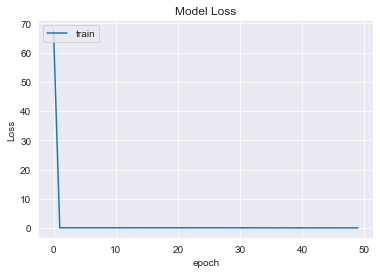

In [12]:
plt.plot(history.history["loss"])
plt.title("Model Loss")
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
yPred = model.predict(X_test, verbose=0)
print(yPred[0:10])
yPred.shape = yPred.shape[0]

[[42.757694]
 [44.115818]
 [61.76643 ]
 [43.992767]
 [73.90265 ]
 [62.440453]
 [45.048874]
 [43.603348]
 [71.13844 ]
 [49.975243]]


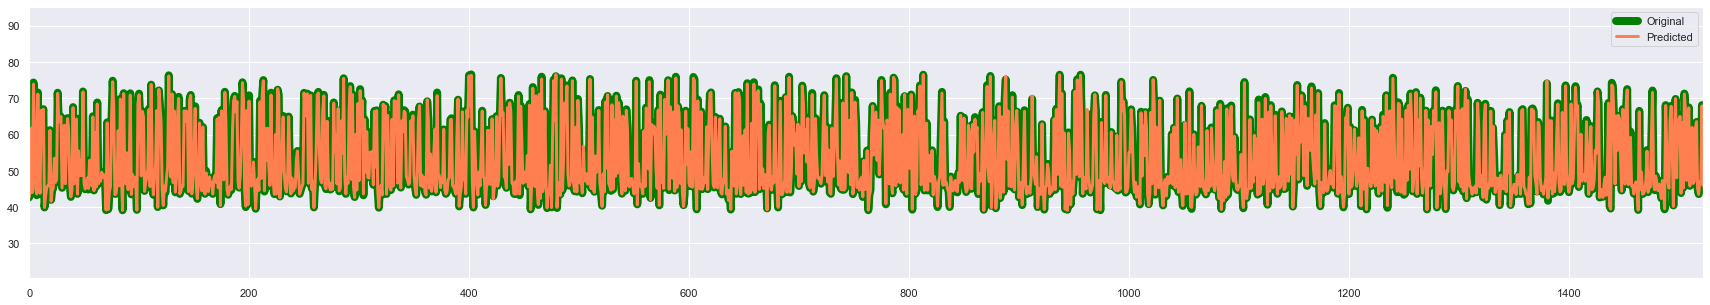

In [14]:
plt.figure(figsize=(30,5))
sns.set(rc={"lines.linewidth": 8})
sns.lineplot(x=np.arange(y_test.shape[0]), y=y_test, color="green")
sns.set(rc={"lines.linewidth": 3})
sns.lineplot(x=np.arange(y_test.shape[0]), y=yPred, color="coral")
plt.margins(x=0, y=0.5)
plt.legend(["Original", "Predicted"])

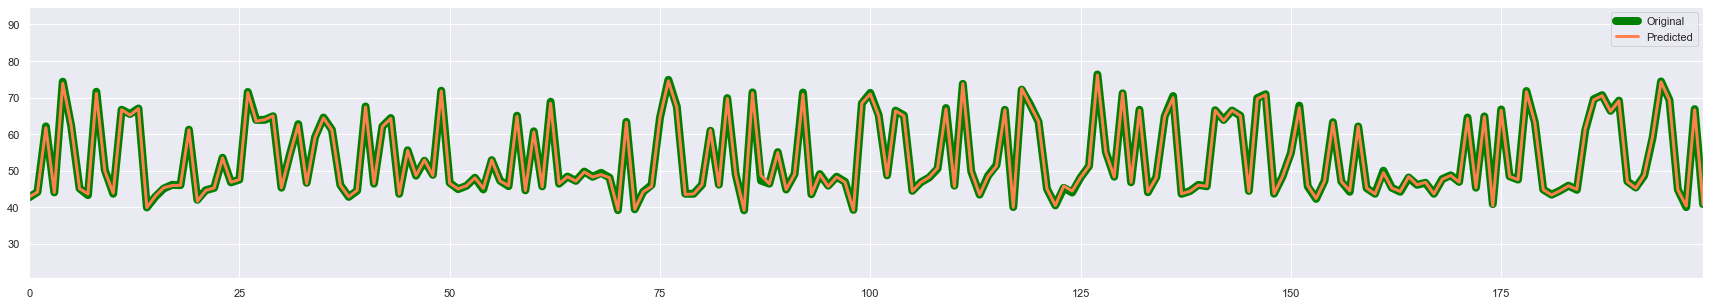

In [15]:
points = 200
plt.figure(figsize=(30,5))
sns.set(rc={"lines.linewidth": 8})
sns.lineplot(x=np.arange(points), y=y_test[:points], color="green")
sns.set(rc={"lines.linewidth": 3})
sns.lineplot(x=np.arange(points), y=yPred[:points], color="coral")
plt.margins(x=0, y=0.5)
plt.legend(["Original", "Predicted"])

In [16]:
my_x = np.zeros((1,7,1))
i = 0

# my_x[0][i][0] = 74.4057
# i+=1
# my_x[0][i][0] = 74.3925
# i+=1
# my_x[0][i][0] = 74.0114
# i+=1
# my_x[0][i][0] = 74.1436
# i+=1
my_x[0][i][0] = 74.1436
i+=1
my_x[0][i][0] = 74.1436
i+=1
my_x[0][i][0] = 73.75
i+=1
my_x[0][i][0] = 74.2433
i+=1
my_x[0][i][0] = 74.4195
i+=1
my_x[0][i][0] = 74.6167
i+=1
my_x[0][i][0] = 74.82
i+=1
# my_x[0][i][0] = 74.45
# i+=1



yPred = model.predict(my_x, verbose=0)
print(yPred)

[[74.55355]]
